<a href="https://colab.research.google.com/github/kimheeseo/LDPC_study/blob/main/10)decode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#(N,K) LDPC code에서 N은 code word, K는 message
k=input('enter the length of Msg Word:');
n=input('enter the length of codeword:');
P=input('enter the parity matrix :')

m=input('enter the Msg word:')
C=encode(m,n,k,'linear',G)
D=decode(C, n, k, 'linear',G)

H=[P' eye(n-k)]
dtable=syndtable(H)
R=input('Enter the received codeword');

S_B=rem(R*H',2)
S_D=bi2de(S_B,'left-msb')
#bi2de : (Not recommended) Convert Binary to Base-P
S_D2=bi2de(S_B)

if (S_D==0)
	disp('The Received codeword is valid')
else
	disp('The Received codeword is Invalid')
#오류가 S_D의 값에 따라 존재유무를 판단할 수 있다.
	E=dtable(S_D+1,:) 
	disp('The corrected codeword is:')
	CC=rem(R+E,2)
	msg=CC(1:k)
end
D=decode(CC,n,k,'linear',G)

# **received codeword : [1 1 1 1 0 0]**

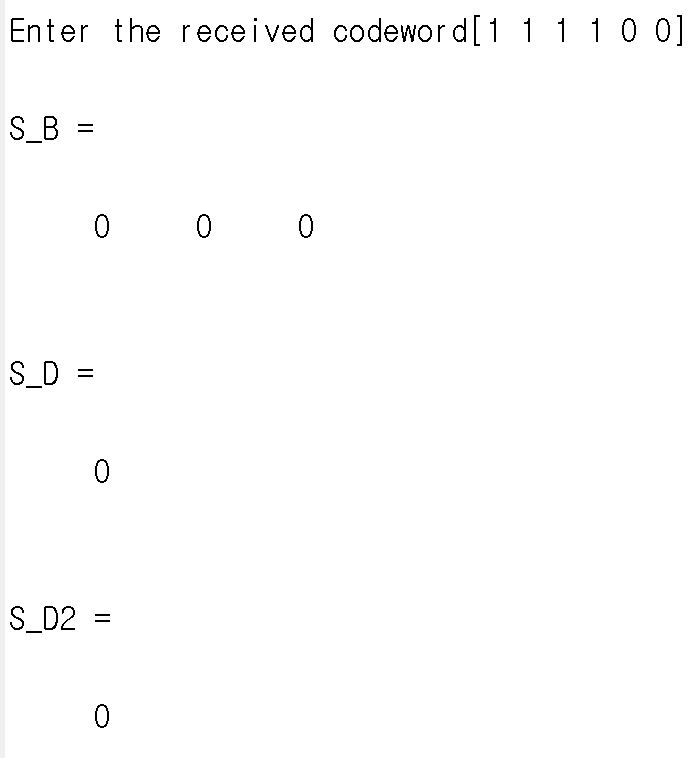

# **CC=[1 1 1 1 0 0]**

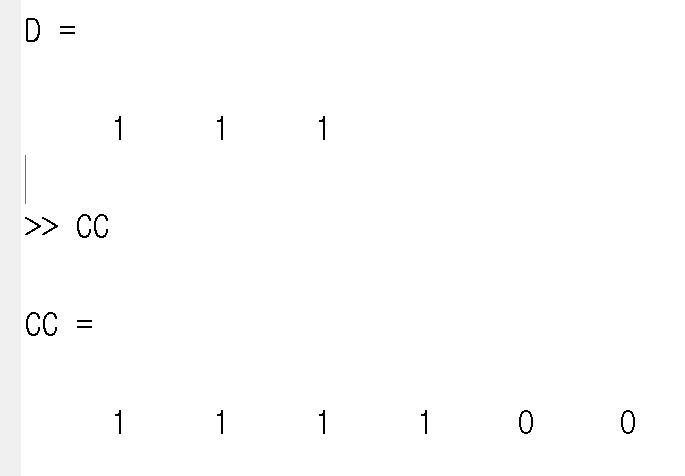

In [ ]:
#CC=[1 1 1 1 0 0]의 코드에서 decode하면 앞의 [1 1 1]이 출력되는 것을 알 수 있고,
#뒤의 4,5,6번째 element인 [1 0 0]인 element는 parity check값이기에, D값이 [1 1 1]이 된다.